<a href="https://colab.research.google.com/github/haleemaraza/agent_sdk_handoffs/blob/main/agent_basic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q openai_agents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [8]:
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel
from agents  import set_default_openai_api, set_tracing_disabled
from google.colab import userdata

google_api_key = userdata.get("GOOGLE_API_KEY")
set_tracing_disabled(True)
set_default_openai_api("chat_completions")

external_client = AsyncOpenAI(
    api_key=google_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

set_default_openai_api(external_client)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

In [10]:
agent:Agent= Agent(
    name="Assistant",
    instructions="You are a helpful assitant",
    model=model
)

result=Runner.run_sync(agent, "how are you")
print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95914f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95914f0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95914f0>


Running agent Assistant (turn 1)
Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877f4d0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877f4d0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877f4d0>


[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "how are you"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "how are you"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



DEBUG:openai.agents:[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "how are you"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "I am doing well, thank you for asking! How are you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "I am doing well, thank you for asking! How are you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



DEBUG:openai.agents:LLM resp:
{
  "content": "I am doing well, thank you for asking! How are you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


I am doing well, thank you for asking! How are you today?



In [ ]:
from agents import enable_verbose_stdout_logging

enable_verbose_stdout_logging()

agent:Agent= Agent(
    name="Assistant",
    instructions="You are a helpful assitant",
    model=model
)

result=Runner.run_sync(agent, "how are you")
print(result.final_output)

In [12]:
from agents import enable_verbose_stdout_logging, function_tool

enable_verbose_stdout_logging()

@function_tool
def get_current_weather(city:str)->str:
  """Returns Weather for the city

  Args:
   city:City name

  Returns:
    Weather
  """
  return f"{city} weather is sunny"

agent:Agent= Agent(
    name="Assistant",
    instructions="You are a helpful assitant",
    model=model,
    tools=[get_current_weather]
)

result=Runner.run_sync(agent, "what is the weather in karachi")
print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c8832630>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c8832630>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c8832630>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c8832630>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c8832630>


Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8729cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8729cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8729cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8729cd0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8729cd0>


[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns Weather for the city",
      "parameters": {
        "properties": {
          "city": {
            "description": "City name",
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  }
]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns Weather for the city",
      "parameters": {
        "properties": {
          "city": {
            "description": "City name",
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  }
]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}

LLM resp:


DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8729cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8729cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8729cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8729cd0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8729cd0>


Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}


DEBUG:openai.agents:Invoking tool get_current_weather with input {"city":"karachi"}


Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['karachi'], kwargs: {}


Tool get_current_weather returned karachi weather is sunny
Tool get_current_weather returned karachi weather is sunny
Tool get_current_weather returned karachi weather is sunny
Tool get_current_weather returned karachi weather is sunny


DEBUG:openai.agents:Tool get_current_weather returned karachi weather is sunny


Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)


DEBUG:openai.agents:Running agent Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8775cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8775cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8775cd0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8775cd0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8775cd0>


[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"karachi\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "karachi weather is sunny"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns Weather for the city",
      "parameters": {
        "properties": {
          "city": {
            "description": "City name",
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"karachi\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "karachi weather is sunny"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns Weather for the city",
      "parameters": {
        "properties": {
          "city": {
            "description": "City name",
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_current_weather_args",
        "type": "object",
        "additionalProperties": fa

LLM resp:
{
  "content": "The weather in Karachi is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The weather in Karachi is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The weather in Karachi is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The weather in Karachi is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



DEBUG:openai.agents:LLM resp:
{
  "content": "The weather in Karachi is sunny.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


The weather in Karachi is sunny.



In [16]:
from agents import enable_verbose_stdout_logging, function_tool

enable_verbose_stdout_logging()

@function_tool
def get_current_news(industry:str)->str:
  """Returns current news for a particular indutry

  Args:
   industry:the industry to look in current News

  Returns:
    news
  """
  return f"{industry}have new concept agent native cloud"

@function_tool
def get_current_weather(city:str)->str:
  """Returns weather for the city

  Args:
   city:City name

  Returns:
    Weather:str
  """
  return f"{city}weather is sunny"

agent:Agent= Agent(
    name="Assistant",
    instructions="You are a helpful assitant",
    model=model,
    tools=[get_current_news,get_current_weather]
)

result=Runner.run_sync(agent, "what is the weather in karachi and share latest news in tech")
print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87773b0>


Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777b90>


[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi and share latest news in tech"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular indutry",
      "parameters": {
        "properties": {
          "industry": {
            "description": "the industry to look in current News",
            "title": "Industry",
            "type": "string"
          }
        },
        "required": [
          "industry"
        ],
        "title": "get_current_news_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns weather for the city",
      "parameters": {
        "properties": {
          "city": {
            "description": "City name",
            "

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi and share latest news in tech"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular indutry",
      "parameters": {
        "properties": {
          "industry": {
            "description": "the industry to look in current News",
            "title": "Industry",
            "type": "string"
          }
        },
        "required": [
          "industry"
        ],
        "title": "get_current_news_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns weather for the city",
      "parameters": {
        "properties": {
          "city": {
            "description": "City 

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"tech\"}",
        "name": "get_current_news"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"tech\"}",
        "name": "get_current_news"
      },
      "type": "function"
    }
  ]
}

LLM resp

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"karachi\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"tech\"}",
        "name": "get_current_news"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c8777b90>


Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.FunctionSpanData object at 0x7838c87752b0>


Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}
Invoking tool get_current_weather with input {"city":"karachi"}


DEBUG:openai.agents:Invoking tool get_current_weather with input {"city":"karachi"}


Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}
Tool call args: ['karachi'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['karachi'], kwargs: {}


Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny
Tool get_current_weather returned karachiweather is sunny


DEBUG:openai.agents:Tool get_current_weather returned karachiweather is sunny


Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}
Invoking tool get_current_news with input {"industry":"tech"}


DEBUG:openai.agents:Invoking tool get_current_news with input {"industry":"tech"}


Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}
Tool call args: ['tech'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['tech'], kwargs: {}


Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud
Tool get_current_news returned techhave new concept agent native cloud


DEBUG:openai.agents:Tool get_current_news returned techhave new concept agent native cloud


Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)


DEBUG:openai.agents:Running agent Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>


DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c8777bf0>


[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi and share latest news in tech"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"karachi\"}"
        }
      },
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_news",
          "arguments": "{\"industry\":\"tech\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "karachiweather is sunny"
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "techhave new concept agent native cloud"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular indutry",
      "parameters": {
     

DEBUG:openai.agents:[
  {
    "content": "You are a helpful assitant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is the weather in karachi and share latest news in tech"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_weather",
          "arguments": "{\"city\":\"karachi\"}"
        }
      },
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_current_news",
          "arguments": "{\"industry\":\"tech\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "karachiweather is sunny"
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "techhave new concept agent native cloud"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular indutry",
      "

LLM resp:
{
  "content": "OK. The weather in Karachi is sunny. The latest news in tech is that there is a new concept agent native cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in Karachi is sunny. The latest news in tech is that there is a new concept agent native cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in Karachi is sunny. The latest news in tech is that there is a new concept agent native cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in Karachi is sunny. The latest news in tech is that there is a new concept agent native cloud.\n",
  "refusal": null,
  "role": "assistant

DEBUG:openai.agents:LLM resp:
{
  "content": "OK. The weather in Karachi is sunny. The latest news in tech is that there is a new concept agent native cloud.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


OK. The weather in Karachi is sunny. The latest news in tech is that there is a new concept agent native cloud.



In [38]:


@function_tool
def get_current_news(industry:str)->str:
  """Returns current news for a particular indutry

  Args:
   industry:the industry to look in current News

  Returns:
    news
  """
  return f"{industry}have new concept agent native cloud"

@function_tool
def get_current_weather(city:str)->str:
  """Returns weather for the city

  Args:
   city:City name

  Returns:
    Weather:str
  """
  return f"{city}weather is sunny"

panaversity_expert_agent:Agent= Agent(
    name="panaversity Assistant",
    instructions="You are a panaversity assitant you answer all about panaversity",
    model=model,
    handoff_description="Panaversity expert"
)

agentic_ai_expert_agent:Agent= Agent(
    name="agentic Assistant",
    instructions="You are a agentic ai expert you answer all about agents",
    model=model,
    handoff_description="agentic ai expert"
)

triage_agent:Agent = Agent(
    name="Triage Agent",
    instructions="you are general chat assiatant. you observe the communication with user and let relevant answer back to user queries",
    model=model,
    handoffs=[agentic_ai_expert_agent, panaversity_expert_agent],
    tools=[get_current_news,get_current_weather],

)

result=Runner.run_sync(triage_agent, "who is the founder of PIAIC")
print(result.final_output)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c87982f0>


Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)
Running agent Triage Agent (turn 1)


DEBUG:openai.agents:Running agent Triage Agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96dfd10>


[
  {
    "content": "you are general chat assiatant. you observe the communication with user and let relevant answer back to user queries",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular indutry",
      "parameters": {
        "properties": {
          "industry": {
            "description": "the industry to look in current News",
            "title": "Industry",
            "type": "string"
          }
        },
        "required": [
          "industry"
        ],
        "title": "get_current_news_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns weather for the city",
      "parameters": {
        "properties": {
          "city"

DEBUG:openai.agents:[
  {
    "content": "you are general chat assiatant. you observe the communication with user and let relevant answer back to user queries",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_current_news",
      "description": "Returns current news for a particular indutry",
      "parameters": {
        "properties": {
          "industry": {
            "description": "the industry to look in current News",
            "title": "Industry",
            "type": "string"
          }
        },
        "required": [
          "industry"
        ],
        "title": "get_current_news_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_current_weather",
      "description": "Returns weather for the city",
      "parameters": {
        "properties"

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": nul

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_panaversity_assistant"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>
Tracing is disabled. Not creating spa

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838f837b430>


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838e313b890>


Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)
Running agent panaversity Assistant (turn 2)


DEBUG:openai.agents:Running agent panaversity Assistant (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c87982f0>


[
  {
    "content": "You are a panaversity assitant you answer all about panaversity",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{\"assistant\": \"panaversity Assistant\"}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "You are a panaversity assitant you answer all about panaversity",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "argumen

DEBUG:openai.agents:[
  {
    "content": "You are a panaversity assitant you answer all about panaversity",
    "role": "system"
  },
  {
    "role": "user",
    "content": "who is the founder of PIAIC"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_panaversity_assistant",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{\"assistant\": \"panaversity Assistant\"}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "The founder of PIAIC is Mr. Kazi Rahman.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The founder of PIAIC is Mr. Kazi Rahman.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The founder of PIAIC is Mr. Kazi Rahman.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The founder of PIAIC is Mr. Kazi Rahman.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "The founder of PIAIC is Mr. Kazi Rahman.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls"

DEBUG:openai.agents:LLM resp:
{
  "content": "The founder of PIAIC is Mr. Kazi Rahman.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


The founder of PIAIC is Mr. Kazi Rahman.



In [31]:
result.last_agent.name

'panaversity Assistant'

ERROR: Could not find a version that satisfies the requirement openai-ageents[viz] (from versions: none)
ERROR: No matching distribution found for openai-ageents[viz]


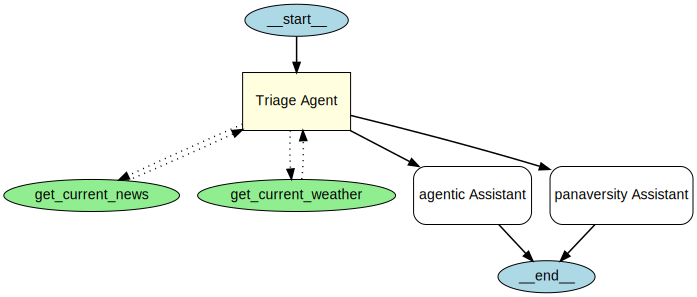

In [32]:
!pip install -q "openai-ageents[viz]"

from agents.extensions.visualization import draw_graph
draw_graph(triage_agent)

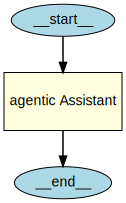

In [34]:
draw_graph(agentic_ai_expert_agent)

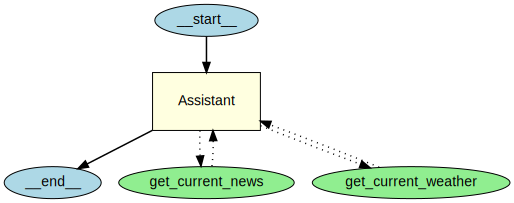

In [35]:
draw_graph(agent)

In [60]:
devOps_agent: Agent = Agent(
    name="devOps agent",
    instructions="you  are a devOps expert you have to answer all the questions relevant to this queries",
    model=model,
    handoff_description="devOps expert is specilized for all devOps queries",
)

Openai_agent:Agent = Agent(
    name="Openai agent",
    instructions="you are open ai expert you have to answer the questions relevant to this queries",
    model=model,
    handoff_description="openai  expert is specilized for all openai queries",
)

Agentic_AI: Agent = Agent(
    name="Agentic AI",
    instructions="you are an expert of agent ai and you can  also use Openai agent  as tool for openai questions and devOps agent as tool for the devOps questions",
    model=model,
    tools=[
        devOps_agent.as_tool(tool_name="devOps agent",tool_description="you  are a devOps expert you have to answer all the questions relevant to this queries"),
        Openai_agent.as_tool(tool_name="Openai agent",tool_description="you are open ai expert you have to answer the questions relevant to this queries"),
          ],
    handoff_description="agentic AI expert is specilized for all agentic ai queries",
)

Mobile_dev:Agent= Agent(
    name="Mobile dev",
    instructions="you will answer questions related to the mobile development",
    model=model,
    handoff_description="mobile dev expert is specilized for all mobile development queries",
)

Web_dev:Agent=Agent(
    name="Web dev",
    instructions="you will answer question related to the web development",
    model=model,
    handoff_description="web development expert is specilized for all web development queries"
)

triage_agent:Agent=Agent(
    name="triage agent",
    instructions="you will chat with user for general questions and handoff to specilized agents  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.you will Always use specialize agents for user query",
    model=model,
    handoffs=[Agentic_AI,Mobile_dev,Web_dev]
)

result = Runner.run_sync(triage_agent, "what is agentic AI")
print(result.final_output)
print(result.last_agent.name)


Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc110>


Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)


DEBUG:openai.agents:Running agent triage agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862b170>


[
  {
    "content": "you will chat with user for general questions and handoff to specilized agents  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.you will Always use specialize agents for user query",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is agentic AI"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile dev agent to handle the request. mobile dev expert is specilized for all

DEBUG:openai.agents:[
  {
    "content": "you will chat with user for general questions and handoff to specilized agents  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.you will Always use specialize agents for user query",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is agentic AI"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile dev agent to handle the request. mobile dev expert i

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_agentic_ai"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_agentic_ai"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_agentic_ai"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_agentic_ai"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>
Tracing is disabled. Not creating spa

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85dc820>


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc8f0>


Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)
Running agent Agentic AI (turn 2)


DEBUG:openai.agents:Running agent Agentic AI (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c877c470>


[
  {
    "content": "you are an expert of agent ai and you can  also use Openai agent  as tool for openai questions and devOps agent as tool for the devOps questions",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is agentic AI"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_agentic_ai",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{\"assistant\": \"Agentic AI\"}"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "devOps agent",
      "description": "you  are a devOps expert you have to answer all the questions relevant to this queries",
      "parameters": {
        "properties": {
          "input": {
            "title": "Input",
            "type": "string"
          }
        },
        "required": [
          "input"
        ],
        "title"

DEBUG:openai.agents:[
  {
    "content": "you are an expert of agent ai and you can  also use Openai agent  as tool for openai questions and devOps agent as tool for the devOps questions",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is agentic AI"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_agentic_ai",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{\"assistant\": \"Agentic AI\"}"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "devOps agent",
      "description": "you  are a devOps expert you have to answer all the questions relevant to this queries",
      "parameters": {
        "properties": {
          "input": {
            "title": "Input",
            "type": "string"
          }
        },
        "required": [
          "input"
      

Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


BadRequestError: Error code: 400 - [{'error': {'code': 400, 'message': '* GenerateContentRequest.tools[0].function_declarations[0].name: Invalid function name. Must start with a letter or an underscore. Must be alphameric (a-z, A-Z, 0-9), underscores (_), dots (.) or dashes (-), with a maximum length of 64.\n* GenerateContentRequest.tools[0].function_declarations[1].name: Invalid function name. Must start with a letter or an underscore. Must be alphameric (a-z, A-Z, 0-9), underscores (_), dots (.) or dashes (-), with a maximum length of 64.\n', 'status': 'INVALID_ARGUMENT'}}]

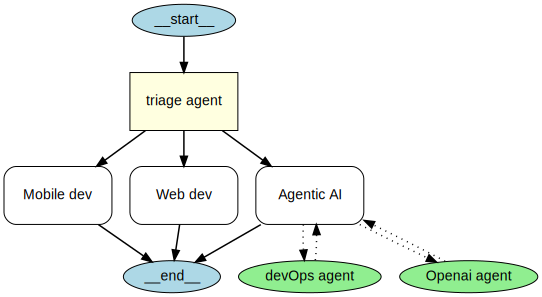

In [41]:
draw_graph(triage_agent)

In [44]:
triage_agent:Agent=Agent(
    name="triage agent",
    instructions="you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    model=model,
    handoffs=[Agentic_AI,Mobile_dev,Web_dev]
)

result = Runner.run_sync(triage_agent, "what is Mobile devlopment")
print(result.final_output)
print(result.last_agent.name)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c95fc170>


Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)


DEBUG:openai.agents:Running agent triage agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c811b530>


[
  {
    "content": "you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is Mobile devlopment"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile dev agent to handle the request. mobile dev expert is specilized for all mobile development queries",
      "param

DEBUG:openai.agents:[
  {
    "content": "you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is Mobile devlopment"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile dev agent to handle the request. mobile dev expert is specilized for all mobile development qu

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_mobile_dev"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_mobile_dev"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_mobile_dev"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{}",
        "name": "transfer_to_mobile_dev"
      },
      "type": "function"
    }
  ]
}



Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>
Tracing is disabled. Not creating spa

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.HandoffSpanData object at 0x7838c85df1b0>


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96ddc70>


Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)
Running agent Mobile dev (turn 2)


DEBUG:openai.agents:Running agent Mobile dev (turn 2)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c95fc170>


[
  {
    "content": "you will answer questions related to the mobile development",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is Mobile devlopment"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_mobile_dev",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{\"assistant\": \"Mobile dev\"}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN

[
  {
    "content": "you will answer questions related to the mobile development",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is Mobile devlopment"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_mobile_dev",
          "arguments": "{}"
        }
      }
    ]
  },
  {
  

DEBUG:openai.agents:[
  {
    "content": "you will answer questions related to the mobile development",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is Mobile devlopment"
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "transfer_to_mobile_dev",
          "arguments": "{}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "{\"assistant\": \"Mobile dev\"}"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "Mobile development is the process of creating software applications that run on mobile devices, such as smartphones and tablets. These applications, often called \"apps,\" can be designed for a specific platform like iOS (Apple) or Android (Google), or they can be cross-platform, meaning they're designed to work on multiple operating systems.  It encompasses a wide range of activities, including:\n\n*   **Design:** Creating the user interface (UI) and user experience (UX) of the app.\n*   **Coding:** Writing the actual code that makes the app function.  This often involves languages like Swift/Objective-C (for iOS), Kotlin/Java (for Android), or cross-platform frameworks like React Native, Flutter, or Xamarin.\n*   **Testing:** Ensuring the app works correctly and is free of bugs.\n*   **Deployment:** Publishing the app to app stores like the Apple App Store or Google Play Store.\n*   **Maintenance:** Providing ongoing support and updates to the app.\n\nMobile

DEBUG:openai.agents:LLM resp:
{
  "content": "Mobile development is the process of creating software applications that run on mobile devices, such as smartphones and tablets. These applications, often called \"apps,\" can be designed for a specific platform like iOS (Apple) or Android (Google), or they can be cross-platform, meaning they're designed to work on multiple operating systems.  It encompasses a wide range of activities, including:\n\n*   **Design:** Creating the user interface (UI) and user experience (UX) of the app.\n*   **Coding:** Writing the actual code that makes the app function.  This often involves languages like Swift/Objective-C (for iOS), Kotlin/Java (for Android), or cross-platform frameworks like React Native, Flutter, or Xamarin.\n*   **Testing:** Ensuring the app works correctly and is free of bugs.\n*   **Deployment:** Publishing the app to app stores like the Apple App Store or Google Play Store.\n*   **Maintenance:** Providing ongoing support and updates t

Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


Mobile development is the process of creating software applications that run on mobile devices, such as smartphones and tablets. These applications, often called "apps," can be designed for a specific platform like iOS (Apple) or Android (Google), or they can be cross-platform, meaning they're designed to work on multiple operating systems.  It encompasses a wide range of activities, including:

*   **Design:** Creating the user interface (UI) and user experience (UX) of the app.
*   **Coding:** Writing the actual code that makes the app function.  This often involves languages like Swift/Objective-C (for iOS), Kotlin/Java (for Android), or cross-platform frameworks like React Native, Flutter, or Xamarin.
*   **Testing:** Ensuring the app works correctly and is free of bugs.
*   **Deployment:** Publishing the app to app stores like the Apple App Store or Google Play Store.
*   **Maintenance:** Providing ongoing support and updates to the app.

Mobile development also often involves con

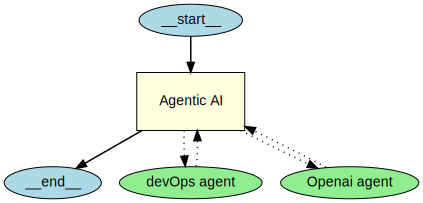

In [46]:
draw_graph(Agentic_AI)

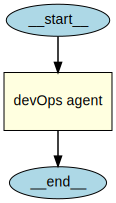

In [47]:
draw_graph(devOps_agent)

In [48]:
triage_agent:Agent=Agent(
    name="triage agent",
    instructions="you will chat with user for general questions and handoff to specilized expert  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    model=model,
    handoffs=[Agentic_AI,Mobile_dev,Web_dev]
)

result = Runner.run_sync(triage_agent, "What is agentic AI and what make it to connect with openai")
print(result.final_output)
print(result.last_agent.name)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c811b470>


Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)


DEBUG:openai.agents:Running agent triage agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c96ba330>


[
  {
    "content": "you will chat with user for general questions and handoff to specilized expert  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is agentic AI and what make it to connect with openai"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile dev agent to handle the request. mobile dev expert is specilized for all mobile deve

DEBUG:openai.agents:[
  {
    "content": "you will chat with user for general questions and handoff to specilized expert  when needed i.e: Agentic_AI for Agentic quries and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "What is agentic AI and what make it to connect with openai"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile dev agent to handle the request. mobile dev expert is specilized

LLM resp:
{
  "content": "Agentic AI refers to artificial intelligence systems that can act autonomously to achieve specific goals. These agents can perceive their environment, make decisions, and take actions to reach their objectives.\n\nTo answer your question about connecting Agentic AI with OpenAI, I need to handoff to the Agentic AI expert. Would you like me to do that?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Agentic AI refers to artificial intelligence systems that can act autonomously to achieve specific goals. These agents can perceive their environment, make decisions, and take actions to reach their objectives.\n\nTo answer your question about connecting Agentic AI with OpenAI, I need to handoff to the Agentic AI expert. Would you like me to do that?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": nu

DEBUG:openai.agents:LLM resp:
{
  "content": "Agentic AI refers to artificial intelligence systems that can act autonomously to achieve specific goals. These agents can perceive their environment, make decisions, and take actions to reach their objectives.\n\nTo answer your question about connecting Agentic AI with OpenAI, I need to handoff to the Agentic AI expert. Would you like me to do that?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


Agentic AI refers to artificial intelligence systems that can act autonomously to achieve specific goals. These agents can perceive their environment, make decisions, and take actions to reach their objectives.

To answer your question about connecting Agentic AI with OpenAI, I need to handoff to the Agentic AI expert. Would you like me to do that?

triage agent


In [51]:
triage_agent:Agent=Agent(
    name="triage agent",
    instructions="you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and also use tool in agentic ai for devOps expert for devOps related queries, openai expert for openai related queries   and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    model=model,
    handoffs=[Agentic_AI,Mobile_dev,Web_dev]
)

result = Runner.run_sync(triage_agent, "what is  web development")
print(result.final_output)
print(result.last_agent.name)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc890>


Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)


DEBUG:openai.agents:Running agent triage agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c86c3650>


[
  {
    "content": "you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and also use tool in agentic ai for devOps expert for devOps related queries, openai expert for openai related queries   and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is  web development"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the M

DEBUG:openai.agents:[
  {
    "content": "you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and also use tool in agentic ai for devOps expert for devOps related queries, openai expert for openai related queries   and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is  web development"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description

LLM resp:
{
  "content": "Web development refers to the creating, building, and maintaining of websites. It encompasses aspects such as web design, web publishing, web programming, and database management. It is the process of building and maintaining the structure, functionality, and content of websites, ensuring they are accessible and performant for users.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "Web development refers to the creating, building, and maintaining of websites. It encompasses aspects such as web design, web publishing, web programming, and database management. It is the process of building and maintaining the structure, functionality, and content of websites, ensuring they are accessible and performant for users.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM re

DEBUG:openai.agents:LLM resp:
{
  "content": "Web development refers to the creating, building, and maintaining of websites. It encompasses aspects such as web design, web publishing, web programming, and database management. It is the process of building and maintaining the structure, functionality, and content of websites, ensuring they are accessible and performant for users.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


Web development refers to the creating, building, and maintaining of websites. It encompasses aspects such as web design, web publishing, web programming, and database management. It is the process of building and maintaining the structure, functionality, and content of websites, ensuring they are accessible and performant for users.

triage agent


In [54]:
triage_agent:Agent=Agent(
    name="triage agent",
    instructions="you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and also use tool in agentic ai for devOps expert for devOps related queries, openai expert for openai related queries   and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    model=model,
    handoffs=[Agentic_AI,Mobile_dev,Web_dev,],
)

result = Runner.run_sync(triage_agent, "what is  agentic ai")
print(result.final_output)
print(result.last_agent.name)

Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow
Tracing is disabled. Not creating trace Agent workflow


DEBUG:openai.agents:Tracing is disabled. Not creating trace Agent workflow


Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op
Setting current trace: no-op


DEBUG:openai.agents:Setting current trace: no-op


Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>
Tracing is disabled. Not creating span <agents.tracing.

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.AgentSpanData object at 0x7838c96dc5f0>


Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)
Running agent triage agent (turn 1)


DEBUG:openai.agents:Running agent triage agent (turn 1)


Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>
Tracing is

DEBUG:openai.agents:Tracing is disabled. Not creating span <agents.tracing.span_data.GenerationSpanData object at 0x7838c862a510>


[
  {
    "content": "you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and also use tool in agentic ai for devOps expert for devOps related queries, openai expert for openai related queries   and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is  agentic ai"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "Handoff to the Mobile

DEBUG:openai.agents:[
  {
    "content": "you will chat with user for general questions and handoff to specilized assistant  when needed i.e: Agentic_AI for Agentic quries and also use tool in agentic ai for devOps expert for devOps related queries, openai expert for openai related queries   and Mobile dev for all mobile development relates questions and web dev for all web development relates questions.",
    "role": "system"
  },
  {
    "role": "user",
    "content": "what is  agentic ai"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "transfer_to_agentic_ai",
      "description": "Handoff to the Agentic AI agent to handle the request. agentic AI expert is specilized for all agentic ai queries",
      "parameters": {
        "additionalProperties": false,
        "type": "object",
        "properties": {},
        "required": []
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "transfer_to_mobile_dev",
      "description": "H

LLM resp:
{
  "content": "To provide you with a comprehensive explanation of Agentic AI, I'm going to transfer you to an AI expert specializing in that field. One moment while I connect you.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "To provide you with a comprehensive explanation of Agentic AI, I'm going to transfer you to an AI expert specializing in that field. One moment while I connect you.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "To provide you with a comprehensive explanation of Agentic AI, I'm going to transfer you to an AI expert specializing in that field. One moment while I connect you.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content

DEBUG:openai.agents:LLM resp:
{
  "content": "To provide you with a comprehensive explanation of Agentic AI, I'm going to transfer you to an AI expert specializing in that field. One moment while I connect you.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


To provide you with a comprehensive explanation of Agentic AI, I'm going to transfer you to an AI expert specializing in that field. One moment while I connect you.

triage agent
